In [1]:
## Import packages used in analysis script:
import numpy as np
from matplotlib.pyplot import *
import glob
import os
import datetime
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from scipy.optimize import least_squares
from random import sample
from astropy.time import Time
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
import pytz
import bisect
import pygeodesy
from mpl_toolkits import mplot3d
import pandas
%matplotlib inline

In [2]:
drone_directory="/Users/wct9/Desktop/LFOP/LFOP_Drone_Data/"
os.chdir(drone_directory)
query=np.sort(glob.glob("*.csv"))
os.chdir('/Users/wct9/python')
print(query)

['FLY457_processed.csv' 'FLY458.csv' 'FLY458_processed.csv'
 'FLY459_processed.csv' 'FLY460.csv' 'FLY460_processed.csv'
 'FLY461_processed.csv']


In [4]:
drone_data=pandas.read_csv(drone_directory+"FLY458.csv")

/Users/wct9/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (107,142,143,144,145,146,147,148,149,150,151,364,368,369,1300,1391) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
for i,col in enumerate(drone_data.columns):
    print(i,col)

0 Tick#
1 offsetTime
2 IMU_ATTI(0):Longitude
3 IMU_ATTI(0):Latitude
4 IMU_ATTI(0):numSats
5 IMU_ATTI(0):barometer:Raw
6 IMU_ATTI(0):barometer:Smooth
7 IMU_ATTI(0):accel:X
8 IMU_ATTI(0):accel:Y
9 IMU_ATTI(0):accel:Z
10 IMU_ATTI(0):accel:Composite
11 IMU_ATTI(0):gyro:X
12 IMU_ATTI(0):gyro:Y
13 IMU_ATTI(0):gyro:Z
14 IMU_ATTI(0):gyro:Composite
15 IMU_ATTI(0):mag:X
16 IMU_ATTI(0):mag:Y
17 IMU_ATTI(0):mag:Z
18 IMU_ATTI(0):mag:Mod
19 IMU_ATTI(0):velN
20 IMU_ATTI(0):velE
21 IMU_ATTI(0):velD
22 IMU_ATTI(0):velComposite
23 IMU_ATTI(0):velH
24 IMU_ATTI(0):GPS-H
25 IMU_ATTI(0):quatW
26 IMU_ATTI(0):quatX
27 IMU_ATTI(0):quatY
28 IMU_ATTI(0):quatZ
29 IMU_ATTI(0):roll
30 IMU_ATTI(0):pitch
31 IMU_ATTI(0):yaw
32 IMU_ATTI(0):yaw360
33 IMU_ATTI(0):totalGyro:Z
34 IMU_ATTI(0):totalGyro:X
35 IMU_ATTI(0):totalGyro:Y
36 IMU_ATTI(0):magYaw
37 IMU_ATTI(0):Yaw-magYaw
38 IMU_ATTI(0):distanceHP
39 IMU_ATTI(0):distanceTravelled
40 IMU_ATTI(0):directionOfTravel[mag]
41 IMU_ATTI(0):directionOfTravel[true]
42 IMU_ATTI(

806 way_debug_info:T_V_y
807 way_debug_info:T_V_z
808 way_debug_info:F_P_x
809 way_debug_info:F_P_y
810 way_debug_info:F_P_z
811 way_debug_info:V_x
812 way_debug_info:V_y
813 way_debug_info:V_z
814 way_debug_info:dV_x
815 way_debug_info:dV_y
816 way_debug_info:ddV_z
817 way_debug_info:dmp_scl
818 way_debug_info:V_dyn_G
819 way_debug_info:P_dyn_G
820 way_debug_info:is_pud
821 way_debug_info:debug_ref_flag
822 way_debug_info:debug_ref_h
823 way_debug_info:debug_ref_cmd
824 way_debug_info:debug_resume_mode
825 IMU_FDI_1:fdi_gyr1
826 IMU_FDI_1:fdi_acc1
827 IMU_FDI_1:fdi_bar1
828 IMU_FDI_1:fdi_mag1
829 IMU_FDI_1:fdi_gps1
830 IMU_FDI_1:fdi_ns1
831 IMU_FDI_1:fdi_multi1
832 IMU_FDI_1:fdi_cnt1
833 IMU_FDI_2:fdi_gyr2
834 IMU_FDI_2:fdi_acc2
835 IMU_FDI_2:fdi_bar2
836 IMU_FDI_2:fdi_mag2
837 IMU_FDI_2:fdi_gps2
838 IMU_FDI_2:fdi_ns2
839 IMU_FDI_2:fdi_multi2
840 IMU_FDI_2:fdi_cnt2
841 ns_sensor_quality:ns_mag_gain
842 ns_data_debug:d00
843 ns_data_debug:d01
844 ns_data_debug:d02
845 ns_data_debug:d03

1306 serial_api_inputs:sdk_pitch_y
1307 serial_api_inputs:sdk_thr_z
1308 serial_api_inputs:sdk_yaw
1309 serial_api_inputs:sdk_fdfd_x
1310 serial_api_inputs:sdk_fdfd_y
1311 serial_api_inputs:ctrl_dev
1312 serial_api_inputs:sub_mode
1313 serial_api_inputs:open_req
1314 serial_api_inputs:open_ack
1315 serial_api_inputs:cmd_req
1316 serial_api_inputs:cmd_ack
1317 serial_api_inputs:avoid_E
1318 serial_api_inputs:bit_S
1319 serial_api_inputs:fact_cnt
1320 serial_api_inputs:f_test
1321 RTKdata:Date
1322 RTKdata:Time
1323 RTKdata:Lon_P
1324 RTKdata:Lat_P
1325 RTKdata:Hmsl_P
1326 RTKdata:Lon_S
1327 RTKdata:Lat_S
1328 RTKdata:Hmsl_S
1329 RTKdata:Vel_N
1330 RTKdata:Vel_E
1331 RTKdata:Vel_D
1332 RTKdata:YAW
1333 RTKdata:SVN_S
1334 RTKdata:SVN_P
1335 RTKdata:hdop
1336 RTKdata:pitch
1337 RTKdata:posFlg_0
1338 RTKdata:posFlg_1
1339 RTKdata:posFlg_2
1340 RTKdata:posFlg_3
1341 RTKdata:posFlg_4
1342 RTKdata:posFlg_5
1343 RTKdata:GpsState
1344 adv_gh_debug_data:SL_req
1345 adv_gh_debug_data:SL_F
1346 adv

In [35]:
drone_data['RTKdata:Date']
#plot(drone_data['offsetTime'])
#plot(drone_data['GPS:dateTimeStamp'])
for i,ts in enumerate(drone_data['GPS:dateTimeStamp']):
    print(i,ts,drone_data['GPS(0):Time'][i],drone_data['GPS(1):Time'][i],drone_data['GPS(2):Time'][i])

0 nan nan nan nan
1 nan nan nan nan
2 nan nan nan nan
3 nan nan nan nan
4 nan nan nan nan
5 nan nan nan nan
6 nan nan nan nan
7 0001-11-30T00:00:00Z 0.0 0.0 0.0
8 0001-11-30T00:00:00Z 0.0 0.0 0.0
9 0001-11-30T00:00:00Z 0.0 0.0 0.0
10 2015-10-18T00:00:00Z 0.0 0.0 0.0
11 2015-10-18T00:00:00Z 0.0 0.0 0.0
12 2015-10-18T00:00:00Z 0.0 0.0 0.0
13 2015-10-18T00:00:00Z 0.0 0.0 0.0
14 2015-10-18T00:00:00Z 0.0 0.0 0.0
15 2015-10-18T00:00:00Z 0.0 0.0 0.0
16 2015-10-18T00:00:00Z 0.0 0.0 0.0
17 2015-10-18T00:00:00Z 0.0 0.0 0.0
18 2015-10-18T00:00:00Z 0.0 1.0 1.0
19 2015-10-18T00:00:00Z 0.0 1.0 1.0
20 2015-10-18T00:00:00Z 0.0 1.0 1.0
21 2015-10-18T00:00:01Z 1.0 1.0 1.0
22 2015-10-18T00:00:01Z 1.0 1.0 1.0
23 2015-10-18T00:00:01Z 1.0 1.0 1.0
24 2015-10-18T00:00:01Z 1.0 1.0 1.0
25 2015-10-18T00:00:01Z 1.0 1.0 1.0
26 2015-10-18T00:00:01Z 1.0 1.0 1.0
27 2015-10-18T00:00:01Z 1.0 1.0 1.0
28 2015-10-18T00:00:01Z 1.0 2.0 1.0
29 2015-10-18T00:00:01Z 1.0 2.0 1.0
30 2015-10-18T00:00:02Z 2.0 2.0 2.0
31 2015-10-18

238 2021-07-30T18:55:36Z 185536.0 185536.0 185536.0
239 2021-07-30T18:55:37Z 185537.0 185536.0 185537.0
240 2021-07-30T18:55:37Z 185537.0 185536.0 185537.0
241 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
242 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
243 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
244 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
245 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
246 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
247 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
248 2021-07-30T18:55:37Z 185537.0 185537.0 185537.0
249 2021-07-30T18:55:37Z 185537.0 185537.0 185538.0
250 2021-07-30T18:55:37Z 185537.0 185537.0 185538.0
251 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
252 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
253 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
254 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
255 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
256 2021-07-30T18:55:38Z 185538.0 185538.0 185538.0
257 2021-07-

438 2021-07-30T18:55:55Z 185555.0 185555.0 185555.0
439 2021-07-30T18:55:56Z 185556.0 185556.0 185555.0
440 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
441 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
442 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
443 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
444 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
445 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
446 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
447 2021-07-30T18:55:56Z 185556.0 185556.0 185556.0
448 2021-07-30T18:55:57Z 185557.0 185556.0 185557.0
449 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
450 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
451 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
452 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
453 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
454 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
455 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
456 2021-07-30T18:55:57Z 185557.0 185557.0 185557.0
457 2021-07-

738 2021-07-30T18:56:25Z 185625.0 185625.0 185626.0
739 2021-07-30T18:56:25Z 185625.0 185625.0 185626.0
740 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
741 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
742 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
743 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
744 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
745 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
746 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
747 2021-07-30T18:56:26Z 185626.0 185626.0 185626.0
748 2021-07-30T18:56:27Z 185627.0 185627.0 185626.0
749 2021-07-30T18:56:27Z 185627.0 185627.0 185626.0
750 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
751 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
752 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
753 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
754 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
755 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
756 2021-07-30T18:56:27Z 185627.0 185627.0 185627.0
757 2021-07-

983 2021-07-30T18:56:50Z 185650.0 185650.0 185650.0
984 2021-07-30T18:56:51Z 185651.0 185650.0 185650.0
985 2021-07-30T18:56:51Z 185651.0 185650.0 185650.0
986 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
987 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
988 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
989 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
990 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
991 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
992 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
993 2021-07-30T18:56:51Z 185651.0 185651.0 185651.0
994 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
995 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
996 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
997 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
998 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
999 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
1000 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
1001 2021-07-30T18:56:52Z 185652.0 185652.0 185652.0
1002 2021-

1238 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1239 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1240 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1241 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1242 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1243 2021-07-30T18:57:16Z 185716.0 185716.0 185716.0
1244 2021-07-30T18:57:16Z 185716.0 185716.0 185717.0
1245 2021-07-30T18:57:16Z 185716.0 185716.0 185717.0
1246 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1247 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1248 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1249 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1250 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1251 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1252 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1253 2021-07-30T18:57:17Z 185717.0 185717.0 185717.0
1254 2021-07-30T18:57:18Z 185718.0 185717.0 185717.0
1255 2021-07-30T18:57:18Z 185718.0 185717.0 185717.0
1256 2021-07-30T18:57:18Z 185718.0 185718.0 18

1537 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1538 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1539 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1540 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1541 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1542 2021-07-30T18:57:46Z 185746.0 185746.0 185746.0
1543 2021-07-30T18:57:47Z 185747.0 185746.0 185746.0
1544 2021-07-30T18:57:47Z 185747.0 185746.0 185746.0
1545 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1546 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1547 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1548 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1549 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1550 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1551 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1552 2021-07-30T18:57:47Z 185747.0 185747.0 185747.0
1553 2021-07-30T18:57:47Z 185747.0 185747.0 185748.0
1554 2021-07-30T18:57:47Z 185747.0 185747.0 185748.0
1555 2021-07-30T18:57:48Z 185748.0 185748.0 18

1837 2021-07-30T18:58:16Z 185816.0 185816.0 185816.0
1838 2021-07-30T18:58:16Z 185816.0 185816.0 185816.0
1839 2021-07-30T18:58:16Z 185816.0 185816.0 185816.0
1840 2021-07-30T18:58:16Z 185816.0 185816.0 185816.0
1841 2021-07-30T18:58:16Z 185816.0 185816.0 185816.0
1842 2021-07-30T18:58:17Z 185817.0 185816.0 185817.0
1843 2021-07-30T18:58:17Z 185817.0 185816.0 185817.0
1844 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1845 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1846 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1847 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1848 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1849 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1850 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1851 2021-07-30T18:58:17Z 185817.0 185817.0 185817.0
1852 2021-07-30T18:58:18Z 185818.0 185817.0 185818.0
1853 2021-07-30T18:58:18Z 185818.0 185817.0 185818.0
1854 2021-07-30T18:58:18Z 185818.0 185818.0 185818.0
1855 2021-07-30T18:58:18Z 185818.0 185818.0 18

2137 2021-07-30T18:58:46Z 185846.0 185846.0 185846.0
2138 2021-07-30T18:58:46Z 185846.0 185846.0 185846.0
2139 2021-07-30T18:58:46Z 185846.0 185846.0 185846.0
2140 2021-07-30T18:58:46Z 185846.0 185846.0 185846.0
2141 2021-07-30T18:58:46Z 185846.0 185846.0 185846.0
2142 2021-07-30T18:58:46Z 185846.0 185847.0 185847.0
2143 2021-07-30T18:58:46Z 185846.0 185847.0 185847.0
2144 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2145 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2146 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2147 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2148 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2149 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2150 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2151 2021-07-30T18:58:47Z 185847.0 185847.0 185847.0
2152 2021-07-30T18:58:47Z 185847.0 185847.0 185848.0
2153 2021-07-30T18:58:47Z 185847.0 185847.0 185848.0
2154 2021-07-30T18:58:48Z 185848.0 185848.0 185848.0
2155 2021-07-30T18:58:48Z 185848.0 185848.0 18

2437 2021-07-30T18:59:16Z 185916.0 185916.0 185916.0
2438 2021-07-30T18:59:16Z 185916.0 185916.0 185916.0
2439 2021-07-30T18:59:16Z 185916.0 185916.0 185916.0
2440 2021-07-30T18:59:16Z 185916.0 185916.0 185916.0
2441 2021-07-30T18:59:17Z 185917.0 185916.0 185916.0
2442 2021-07-30T18:59:17Z 185917.0 185916.0 185916.0
2443 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2444 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2445 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2446 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2447 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2448 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2449 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2450 2021-07-30T18:59:17Z 185917.0 185917.0 185917.0
2451 2021-07-30T18:59:17Z 185917.0 185917.0 185918.0
2452 2021-07-30T18:59:17Z 185917.0 185917.0 185918.0
2453 2021-07-30T18:59:18Z 185918.0 185918.0 185918.0
2454 2021-07-30T18:59:18Z 185918.0 185918.0 185918.0
2455 2021-07-30T18:59:18Z 185918.0 185918.0 18

2737 2021-07-30T18:59:46Z 185946.0 185946.0 185946.0
2738 2021-07-30T18:59:46Z 185946.0 185946.0 185946.0
2739 2021-07-30T18:59:46Z 185946.0 185946.0 185946.0
2740 2021-07-30T18:59:46Z 185946.0 185946.0 185946.0
2741 2021-07-30T18:59:47Z 185947.0 185946.0 185947.0
2742 2021-07-30T18:59:47Z 185947.0 185946.0 185947.0
2743 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2744 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2745 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2746 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2747 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2748 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2749 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2750 2021-07-30T18:59:47Z 185947.0 185947.0 185947.0
2751 2021-07-30T18:59:47Z 185947.0 185948.0 185948.0
2752 2021-07-30T18:59:47Z 185947.0 185948.0 185948.0
2753 2021-07-30T18:59:48Z 185948.0 185948.0 185948.0
2754 2021-07-30T18:59:48Z 185948.0 185948.0 185948.0
2755 2021-07-30T18:59:48Z 185948.0 185948.0 18

2980 2021-07-30T19:00:10Z 190010.0 190010.0 190011.0
2981 2021-07-30T19:00:10Z 190010.0 190010.0 190011.0
2982 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2983 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2984 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2985 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2986 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2987 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2988 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2989 2021-07-30T19:00:11Z 190011.0 190011.0 190011.0
2990 2021-07-30T19:00:12Z 190012.0 190011.0 190012.0
2991 2021-07-30T19:00:12Z 190012.0 190011.0 190012.0
2992 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2993 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2994 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2995 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2996 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2997 2021-07-30T19:00:12Z 190012.0 190012.0 190012.0
2998 2021-07-30T19:00:12Z 190012.0 190012.0 19

3209 2021-07-30T19:00:33Z 190033.0 190033.0 190033.0
3210 2021-07-30T19:00:33Z 190033.0 190034.0 190034.0
3211 2021-07-30T19:00:33Z 190033.0 190034.0 190034.0
3212 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3213 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3214 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3215 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3216 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3217 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3218 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3219 2021-07-30T19:00:34Z 190034.0 190034.0 190034.0
3220 2021-07-30T19:00:34Z 190034.0 190034.0 190035.0
3221 2021-07-30T19:00:34Z 190034.0 190034.0 190035.0
3222 2021-07-30T19:00:35Z 190035.0 190035.0 190035.0
3223 2021-07-30T19:00:35Z 190035.0 190035.0 190035.0
3224 2021-07-30T19:00:35Z 190035.0 190035.0 190035.0
3225 2021-07-30T19:00:35Z 190035.0 190035.0 190035.0
3226 2021-07-30T19:00:35Z 190035.0 190035.0 190035.0
3227 2021-07-30T19:00:35Z 190035.0 190035.0 19

3386 2021-07-30T19:00:51Z 190051.0 190051.0 190051.0
3387 2021-07-30T19:00:51Z 190051.0 190051.0 190051.0
3388 2021-07-30T19:00:51Z 190051.0 190051.0 190051.0
3389 2021-07-30T19:00:52Z 190052.0 190051.0 190051.0
3390 2021-07-30T19:00:52Z 190052.0 190051.0 190051.0
3391 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3392 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3393 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3394 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3395 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3396 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3397 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3398 2021-07-30T19:00:52Z 190052.0 190052.0 190052.0
3399 2021-07-30T19:00:53Z 190053.0 190053.0 190053.0
3400 2021-07-30T19:00:53Z 190053.0 190053.0 190053.0
3401 2021-07-30T19:00:53Z 190053.0 190053.0 190053.0
3402 2021-07-30T19:00:53Z 190053.0 190053.0 190053.0
3403 2021-07-30T19:00:53Z 190053.0 190053.0 190053.0
3404 2021-07-30T19:00:53Z 190053.0 190053.0 19

3544 2021-07-30T19:01:07Z 190107.0 190107.0 190107.0
3545 2021-07-30T19:01:07Z 190107.0 190107.0 190107.0
3546 2021-07-30T19:01:07Z 190107.0 190107.0 190107.0
3547 2021-07-30T19:01:07Z 190107.0 190107.0 190107.0
3548 2021-07-30T19:01:07Z 190107.0 190107.0 190107.0
3549 2021-07-30T19:01:07Z 190107.0 190107.0 190108.0
3550 2021-07-30T19:01:07Z 190107.0 190107.0 190108.0
3551 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3552 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3553 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3554 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3555 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3556 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3557 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3558 2021-07-30T19:01:08Z 190108.0 190108.0 190108.0
3559 2021-07-30T19:01:08Z 190108.0 190108.0 190109.0
3560 2021-07-30T19:01:08Z 190108.0 190108.0 190109.0
3561 2021-07-30T19:01:09Z 190109.0 190109.0 190109.0
3562 2021-07-30T19:01:09Z 190109.0 190109.0 19

3737 2021-07-30T19:01:26Z 190126.0 190126.0 190126.0
3738 2021-07-30T19:01:26Z 190126.0 190126.0 190126.0
3739 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3740 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3741 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3742 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3743 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3744 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3745 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3746 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3747 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3748 2021-07-30T19:01:27Z 190127.0 190127.0 190127.0
3749 2021-07-30T19:01:27Z 190127.0 190127.0 190128.0
3750 2021-07-30T19:01:27Z 190127.0 190127.0 190128.0
3751 2021-07-30T19:01:28Z 190128.0 190128.0 190128.0
3752 2021-07-30T19:01:28Z 190128.0 190128.0 190128.0
3753 2021-07-30T19:01:28Z 190128.0 190128.0 190128.0
3754 2021-07-30T19:01:28Z 190128.0 190128.0 190128.0
3755 2021-07-30T19:01:28Z 190128.0 190128.0 19

4036 2021-07-30T19:01:56Z 190156.0 190156.0 190156.0
4037 2021-07-30T19:01:56Z 190156.0 190156.0 190156.0
4038 2021-07-30T19:01:57Z 190157.0 190156.0 190157.0
4039 2021-07-30T19:01:57Z 190157.0 190156.0 190157.0
4040 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4041 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4042 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4043 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4044 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4045 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4046 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4047 2021-07-30T19:01:57Z 190157.0 190157.0 190157.0
4048 2021-07-30T19:01:58Z 190158.0 190157.0 190158.0
4049 2021-07-30T19:01:58Z 190158.0 190157.0 190158.0
4050 2021-07-30T19:01:58Z 190158.0 190158.0 190158.0
4051 2021-07-30T19:01:58Z 190158.0 190158.0 190158.0
4052 2021-07-30T19:01:58Z 190158.0 190158.0 190158.0
4053 2021-07-30T19:01:58Z 190158.0 190158.0 190158.0
4054 2021-07-30T19:01:58Z 190158.0 190158.0 19

4336 2021-07-30T19:02:26Z 190226.0 190226.0 190226.0
4337 2021-07-30T19:02:26Z 190226.0 190226.0 190226.0
4338 2021-07-30T19:02:26Z 190226.0 190227.0 190226.0
4339 2021-07-30T19:02:26Z 190226.0 190227.0 190226.0
4340 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4341 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4342 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4343 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4344 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4345 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4346 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4347 2021-07-30T19:02:27Z 190227.0 190227.0 190227.0
4348 2021-07-30T19:02:28Z 190228.0 190227.0 190228.0
4349 2021-07-30T19:02:28Z 190228.0 190227.0 190228.0
4350 2021-07-30T19:02:28Z 190228.0 190228.0 190228.0
4351 2021-07-30T19:02:28Z 190228.0 190228.0 190228.0
4352 2021-07-30T19:02:28Z 190228.0 190228.0 190228.0
4353 2021-07-30T19:02:28Z 190228.0 190228.0 190228.0
4354 2021-07-30T19:02:28Z 190228.0 190228.0 19

4636 2021-07-30T19:02:56Z 190256.0 190256.0 190256.0
4637 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4638 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4639 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4640 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4641 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4642 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4643 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4644 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4645 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4646 2021-07-30T19:02:57Z 190257.0 190257.0 190257.0
4647 2021-07-30T19:02:58Z 190258.0 190257.0 190258.0
4648 2021-07-30T19:02:58Z 190258.0 190257.0 190258.0
4649 2021-07-30T19:02:58Z 190258.0 190258.0 190258.0
4650 2021-07-30T19:02:58Z 190258.0 190258.0 190258.0
4651 2021-07-30T19:02:58Z 190258.0 190258.0 190258.0
4652 2021-07-30T19:02:58Z 190258.0 190258.0 190258.0
4653 2021-07-30T19:02:58Z 190258.0 190258.0 190258.0
4654 2021-07-30T19:02:58Z 190258.0 190258.0 19

4936 2021-07-30T19:03:27Z 190327.0 190326.0 190327.0
4937 2021-07-30T19:03:27Z 190327.0 190326.0 190327.0
4938 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4939 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4940 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4941 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4942 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4943 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4944 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4945 2021-07-30T19:03:27Z 190327.0 190327.0 190327.0
4946 2021-07-30T19:03:28Z 190328.0 190327.0 190328.0
4947 2021-07-30T19:03:28Z 190328.0 190327.0 190328.0
4948 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4949 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4950 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4951 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4952 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4953 2021-07-30T19:03:28Z 190328.0 190328.0 190328.0
4954 2021-07-30T19:03:28Z 190328.0 190328.0 19

5236 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5237 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5238 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5239 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5240 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5241 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5242 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5243 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5244 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5245 2021-07-30T19:03:57Z 190357.0 190357.0 190357.0
5246 2021-07-30T19:03:57Z 190357.0 190358.0 190358.0
5247 2021-07-30T19:03:57Z 190357.0 190358.0 190358.0
5248 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5249 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5250 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5251 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5252 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5253 2021-07-30T19:03:58Z 190358.0 190358.0 190358.0
5254 2021-07-30T19:03:58Z 190358.0 190358.0 19

5500 2021-07-30T19:04:23Z 190423.0 190423.0 190423.0
5501 2021-07-30T19:04:23Z 190423.0 190423.0 190423.0
5502 2021-07-30T19:04:23Z 190423.0 190423.0 190423.0
5503 2021-07-30T19:04:23Z 190423.0 190423.0 190423.0
5504 2021-07-30T19:04:23Z 190423.0 190423.0 190423.0
5505 2021-07-30T19:04:23Z 190423.0 190423.0 190424.0
5506 2021-07-30T19:04:23Z 190423.0 190423.0 190424.0
5507 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5508 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5509 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5510 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5511 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5512 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5513 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5514 2021-07-30T19:04:24Z 190424.0 190424.0 190424.0
5515 2021-07-30T19:04:24Z 190424.0 190425.0 190425.0
5516 2021-07-30T19:04:24Z 190424.0 190425.0 190425.0
5517 2021-07-30T19:04:25Z 190425.0 190425.0 190425.0
5518 2021-07-30T19:04:25Z 190425.0 190425.0 19

5675 2021-07-30T19:04:40Z 190440.0 190441.0 190441.0
5676 2021-07-30T19:04:40Z 190440.0 190441.0 190441.0
5677 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5678 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5679 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5680 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5681 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5682 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5683 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5684 2021-07-30T19:04:41Z 190441.0 190441.0 190441.0
5685 2021-07-30T19:04:41Z 190441.0 190442.0 190442.0
5686 2021-07-30T19:04:41Z 190441.0 190442.0 190442.0
5687 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5688 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5689 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5690 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5691 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5692 2021-07-30T19:04:42Z 190442.0 190442.0 190442.0
5693 2021-07-30T19:04:42Z 190442.0 190442.0 19

5924 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5925 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5926 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5927 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5928 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5929 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5930 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5931 2021-07-30T19:05:06Z 190506.0 190506.0 190506.0
5932 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5933 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5934 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5935 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5936 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5937 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5938 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5939 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5940 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5941 2021-07-30T19:05:07Z 190507.0 190507.0 190507.0
5942 2021-07-30T19:05:08Z 190508.0 190507.0 19

6136 2021-07-30T19:05:27Z 190527.0 190527.0 190527.0
6137 2021-07-30T19:05:27Z 190527.0 190527.0 190527.0
6138 2021-07-30T19:05:27Z 190527.0 190527.0 190527.0
6139 2021-07-30T19:05:27Z 190527.0 190527.0 190527.0
6140 2021-07-30T19:05:27Z 190527.0 190527.0 190527.0
6141 2021-07-30T19:05:27Z 190527.0 190527.0 190528.0
6142 2021-07-30T19:05:27Z 190527.0 190527.0 190528.0
6143 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6144 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6145 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6146 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6147 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6148 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6149 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6150 2021-07-30T19:05:28Z 190528.0 190528.0 190528.0
6151 2021-07-30T19:05:28Z 190528.0 190528.0 190529.0
6152 2021-07-30T19:05:28Z 190528.0 190528.0 190529.0
6153 2021-07-30T19:05:29Z 190529.0 190529.0 190529.0
6154 2021-07-30T19:05:29Z 190529.0 190529.0 19

6436 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6437 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6438 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6439 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6440 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6441 2021-07-30T19:05:57Z 190557.0 190557.0 190557.0
6442 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6443 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6444 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6445 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6446 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6447 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6448 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6449 2021-07-30T19:05:58Z 190558.0 190558.0 190558.0
6450 2021-07-30T19:05:58Z 190558.0 190559.0 190558.0
6451 2021-07-30T19:05:58Z 190558.0 190559.0 190558.0
6452 2021-07-30T19:05:59Z 190559.0 190559.0 190559.0
6453 2021-07-30T19:05:59Z 190559.0 190559.0 190559.0
6454 2021-07-30T19:05:59Z 190559.0 190559.0 19

6735 2021-07-30T19:06:27Z 190627.0 190627.0 190627.0
6736 2021-07-30T19:06:27Z 190627.0 190627.0 190627.0
6737 2021-07-30T19:06:27Z 190627.0 190627.0 190627.0
6738 2021-07-30T19:06:27Z 190627.0 190627.0 190627.0
6739 2021-07-30T19:06:27Z 190627.0 190627.0 190627.0
6740 2021-07-30T19:06:27Z 190627.0 190627.0 190628.0
6741 2021-07-30T19:06:27Z 190627.0 190627.0 190628.0
6742 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6743 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6744 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6745 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6746 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6747 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6748 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6749 2021-07-30T19:06:28Z 190628.0 190628.0 190628.0
6750 2021-07-30T19:06:29Z 190629.0 190629.0 190628.0
6751 2021-07-30T19:06:29Z 190629.0 190629.0 190628.0
6752 2021-07-30T19:06:29Z 190629.0 190629.0 190629.0
6753 2021-07-30T19:06:29Z 190629.0 190629.0 19

7035 2021-07-30T19:06:57Z 190657.0 190657.0 190657.0
7036 2021-07-30T19:06:57Z 190657.0 190657.0 190657.0
7037 2021-07-30T19:06:57Z 190657.0 190657.0 190657.0
7038 2021-07-30T19:06:57Z 190657.0 190657.0 190657.0
7039 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7040 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7041 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7042 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7043 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7044 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7045 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7046 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7047 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7048 2021-07-30T19:06:58Z 190658.0 190658.0 190658.0
7049 2021-07-30T19:06:59Z 190659.0 190658.0 190659.0
7050 2021-07-30T19:06:59Z 190659.0 190658.0 190659.0
7051 2021-07-30T19:06:59Z 190659.0 190659.0 190659.0
7052 2021-07-30T19:06:59Z 190659.0 190659.0 190659.0
7053 2021-07-30T19:06:59Z 190659.0 190659.0 19

7335 2021-07-30T19:07:27Z 190727.0 190727.0 190727.0
7336 2021-07-30T19:07:27Z 190727.0 190727.0 190727.0
7337 2021-07-30T19:07:27Z 190727.0 190727.0 190727.0
7338 2021-07-30T19:07:28Z 190728.0 190727.0 190728.0
7339 2021-07-30T19:07:28Z 190728.0 190727.0 190728.0
7340 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7341 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7342 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7343 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7344 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7345 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7346 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7347 2021-07-30T19:07:28Z 190728.0 190728.0 190728.0
7348 2021-07-30T19:07:29Z 190729.0 190729.0 190729.0
7349 2021-07-30T19:07:29Z 190729.0 190729.0 190729.0
7350 2021-07-30T19:07:29Z 190729.0 190729.0 190729.0
7351 2021-07-30T19:07:29Z 190729.0 190729.0 190729.0
7352 2021-07-30T19:07:29Z 190729.0 190729.0 190729.0
7353 2021-07-30T19:07:29Z 190729.0 190729.0 19

7635 2021-07-30T19:07:57Z 190757.0 190757.0 190757.0
7636 2021-07-30T19:07:57Z 190757.0 190757.0 190757.0
7637 2021-07-30T19:07:57Z 190757.0 190757.0 190757.0
7638 2021-07-30T19:07:57Z 190757.0 190757.0 190757.0
7639 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7640 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7641 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7642 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7643 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7644 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7645 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7646 2021-07-30T19:07:58Z 190758.0 190758.0 190758.0
7647 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7648 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7649 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7650 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7651 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7652 2021-07-30T19:07:59Z 190759.0 190759.0 190759.0
7653 2021-07-30T19:07:59Z 190759.0 190759.0 19

7935 2021-07-30T19:08:27Z 190827.0 190827.0 190827.0
7936 2021-07-30T19:08:27Z 190827.0 190827.0 190827.0
7937 2021-07-30T19:08:27Z 190827.0 190827.0 190828.0
7938 2021-07-30T19:08:27Z 190827.0 190827.0 190828.0
7939 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7940 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7941 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7942 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7943 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7944 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7945 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7946 2021-07-30T19:08:28Z 190828.0 190828.0 190828.0
7947 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7948 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7949 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7950 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7951 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7952 2021-07-30T19:08:29Z 190829.0 190829.0 190829.0
7953 2021-07-30T19:08:29Z 190829.0 190829.0 19

8235 2021-07-30T19:08:57Z 190857.0 190857.0 190857.0
8236 2021-07-30T19:08:57Z 190857.0 190857.0 190857.0
8237 2021-07-30T19:08:57Z 190857.0 190857.0 190857.0
8238 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8239 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8240 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8241 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8242 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8243 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8244 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8245 2021-07-30T19:08:58Z 190858.0 190858.0 190858.0
8246 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8247 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8248 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8249 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8250 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8251 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8252 2021-07-30T19:08:59Z 190859.0 190859.0 190859.0
8253 2021-07-30T19:08:59Z 190859.0 190859.0 19

In [12]:
680.342/60

11.339033333333333

In [40]:
def interp_time(df_in):
    # find where the GPS turns on
    gps_idx = df_in[df_in.gpsUsed == True].index[0]

    # find the first datetimestamp after that
    first_dts = df_in["GPS:dateTimeStamp"][gps_idx]
    # oops, maybe the GPS needs a minute to warm up
    while(type(first_dts) == type(1.0) and gps_idx < len(df_in)-10):
        print("inc")
        gps_idx = gps_idx+1
        first_dts = df_in["GPS:dateTimeStamp"][gps_idx]

    print("Interpolating time starting at "+str(first_dts))

    # look for where the datetimestamp ticks
    start_sec = int(first_dts[-3:-1])

    while(int(df_in["GPS:dateTimeStamp"][gps_idx][-3:-1]) == start_sec):
        gps_idx = gps_idx + 1

    # use this reference timestamp to convert the offsetTime column into proper datetimes
    start_dt = pandas.to_datetime(df_in["GPS:dateTimeStamp"][gps_idx])

    offsets = np.array(df_in["offsetTime"]-df_in["offsetTime"][gps_idx])
    offsets = pandas.to_timedelta(offsets, unit='s')

    timestamps = start_dt + offsets

    # put them in the dataframe
    df_in = df_in.assign(timestamp = timestamps)
    df_in = df_in.assign(UTC = timestamps)
    
    return df_in

In [41]:
interp_time(drone_data)

Interpolating time starting at 2021-07-30T18:55:48Z


,Tick#,offsetTime,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,...,ahrs_data:ns_agy,ahrs_data:ns_agz,ahrs_data:ns_vgx,ahrs_data:ns_vgy,ahrs_data:ns_vgz,Attribute|Value,ConvertDatV3,3.6.6,timestamp,UTC
0,11403261,-161.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Firmware Date| Jan 7 2019,NaN,NaN,2021-07-30 18:55:09.187000+00:00,2021-07-30 18:55:09.187000+00:00
1,18251354,-159.585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ACType|M600,NaN,NaN,2021-07-30 18:55:10.709000+00:00,2021-07-30 18:55:10.709000+00:00
2,22542148,-158.632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-30 18:55:11.662000+00:00,2021-07-30 18:55:11.662000+00:00
3,23278222,-158.468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-30 18:55:11.826000+00:00,2021-07-30 18:55:11.826000+00:00
4,23732647,-158.367,NaN,NaN,0.0,0.000000,-0.000000,-0.199929,0.133262,-1.047521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-30 18:55:11.927000+00:00,2021-07-30 18:55:11.927000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,3797921758,680.342,-72.922273,41.320748,15.0,74.617966,75.469696,-0.042156,-0.011794,-0.998604,...,-0.159452,-0.015035,0.006333,-0.044174,0.026488,NaN,NaN,NaN,2021-07-30 19:09:10.636000+00:00,2021-07-30 19:09:10.636000+00:00
8365,3798375669,680.442,-72.922273,41.320748,15.0,74.334440,75.464294,-0.036996,-0.027330,-1.015028,...,-0.135405,0.021779,-0.013736,-0.046584,0.027359,NaN,NaN,NaN,2021-07-30 19:09:10.736000+00:00,2021-07-30 19:09:10.736000+00:00
8366,3798827839,680.543,-72.922273,41.320748,15.0,74.553020,75.458374,-0.018894,-0.030526,-1.008046,...,0.233874,-0.024943,-0.028853,-0.044083,0.037039,NaN,NaN,NaN,2021-07-30 19:09:10.837000+00:00,2021-07-30 19:09:10.837000+00:00
8367,3799277956,680.643,-72.922273,41.320748,15.0,74.710754,75.448440,0.010305,-0.012494,-0.999248,...,0.335588,-0.008063,-0.023429,-0.040425,0.046986,NaN,NaN,NaN,2021-07-30 19:09:10.937000+00:00,2021-07-30 19:09:10.937000+00:00


In [70]:
test=pandas.read_csv(drone_directory+"FLY460_processed.csv")
test.columns

Index(['Unnamed: 0', 'Lat', 'Lon', 'hmsl', 'sec_elapsed', 'datetimestamp',
       'tick', 'vel', 'yaw_rtk', 'pitch_rtk', 'pitch', 'roll', 'yaw',
       'yaw_360', 'IMU_lat', 'IMU_lon', 'IMU_hmsl', 'UTC'],
      dtype='object')

/Users/wct9/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  """Entry point for launching an IPython kernel.
/Users/wct9/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


Text(0.5, 0, 'index')

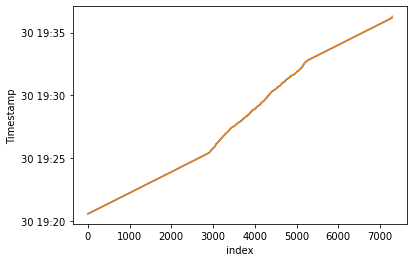

In [72]:
plot(np.array([np.datetime64(test['datetimestamp'][m]) for m in range(len(test['datetimestamp']))]))
plot(np.array([np.datetime64(test['UTC'][m]) for m in range(len(test['UTC']))]))
ylabel('Timestamp')
xlabel('index')

In [61]:
test['datetimestamp'][0],test['UTC'][0]

('2021-07-30T18:55:41Z', '2021-07-30 18:55:40.978000+00:00')

In [63]:
test.UTC

0       2021-07-30 18:55:40.978000+00:00
1       2021-07-30 18:55:41.078000+00:00
2       2021-07-30 18:55:41.178000+00:00
3       2021-07-30 18:55:41.278000+00:00
4       2021-07-30 18:55:41.379000+00:00
                      ...               
8067    2021-07-30 19:09:10.636000+00:00
8068    2021-07-30 19:09:10.736000+00:00
8069    2021-07-30 19:09:10.837000+00:00
8070    2021-07-30 19:09:10.937000+00:00
8071    2021-07-30 19:09:11.037000+00:00
Name: UTC, Length: 8072, dtype: object

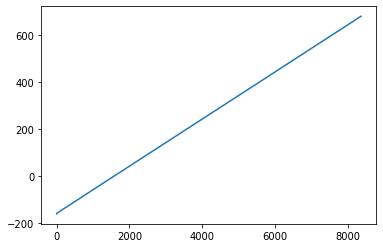

In [74]:
plot(drone_data['offsetTime'])